# Add Files, Pictures, and Hyperlinks
Add File, Picture, and Hyperlink attribute types to MI.

## Connect to MI
Specify a database and table.

In [1]:
from datetime import datetime
import pathlib
from GRANTA_MIScriptingToolkit import granta as mpy

mi = mpy.connect('http://localhost/mi_servicelayer', autologon=True)
db = mi.get_db(db_key='MI_Training')
tab = db.get_table('Tensile Test Data')

## Create a new record 
Define a path in the table from a starting folder (in this case the top level folder) using `path_from()`.
If the path does not exist, the required folders will be created.
Specify `end_node` to create a new **Record** object at the end of the path with that name.

In [2]:
now = datetime.now().strftime("%c")
record_name = 'STK Example 11: {}'.format(now)
record = tab.path_from(None, tree_path=['High Alloy Steels', 'AMS 6520', 'Plate', '300°F'], end_node=record_name)
record

<Record long name:STK Example 11: Tue May 10 22:53:28 2022>

Access the (empty) **AttributeFile**, **AttributePicture**, and **AttributeHyperlink** objects.

In [3]:
new_file = record.attributes['Test File 1']
new_pict = record.attributes['Image 2']
test_method_link = record.attributes['Standard Tension Testing Method']
test_method_link

<HyperlinkValue name: Standard Tension Testing Method, url: None>

## Add files to the record
To add a file to a file attribute (or a picture to a picture attribute) create a **File** (or **Picture**) object
and assign it to the attribute's `value`. There are two ways of attaching the file:

Set the `binary_data` property directly with either a file buffer or bytes object.
(Useful when you have a file already loaded in your script.)

In [4]:
file_object = mpy.File()
filename = 'example.csv'
with open(filename, 'rb') as file_buffer:
    file_object.binary_data = file_buffer.read()
file_object.name = filename
file_object.description = 'This is an example file'
new_file.object = file_object
new_file

<FileValue name: Test File 1, file_name: example.csv, description: This is an exampl...>

Pass a **str** or **pathlib.Path** to the location of the file or picture. (Useful when you have a file on disk.)

In [5]:
picture = pathlib.Path('./example.jpg')
picture_object = mpy.Picture(path=picture)
new_pict.object = picture_object
new_pict

<PictureValue name: Image 2, populated: True>

## Add hyperlinks to the record
To add a hyperlink to a hyperlink attribute, create a **Hyperlink** object
and assign it to the attribute's `object`.

In [6]:
hyperlink_object = mpy.Hyperlink('https://www.astm.org/Standards/E8',
                                 hyperlink_display='New',
                                 hyperlink_description='Specification')
test_method_link.object = hyperlink_object
test_method_link

<HyperlinkValue name: Standard Tension Testing Method, url: https://www.astm.org/Standards/E8>

Set the new attributes to update, and write the changes to MI.

In [7]:
record.set_attributes([new_file, new_pict, test_method_link])
record = mi.update([record])[0]

## Save files attached to a record
Verify your changes by first extracting the new image from the record, then saving it to disk.
You can either access the `value` directly or provide a file path to the `save()` method.

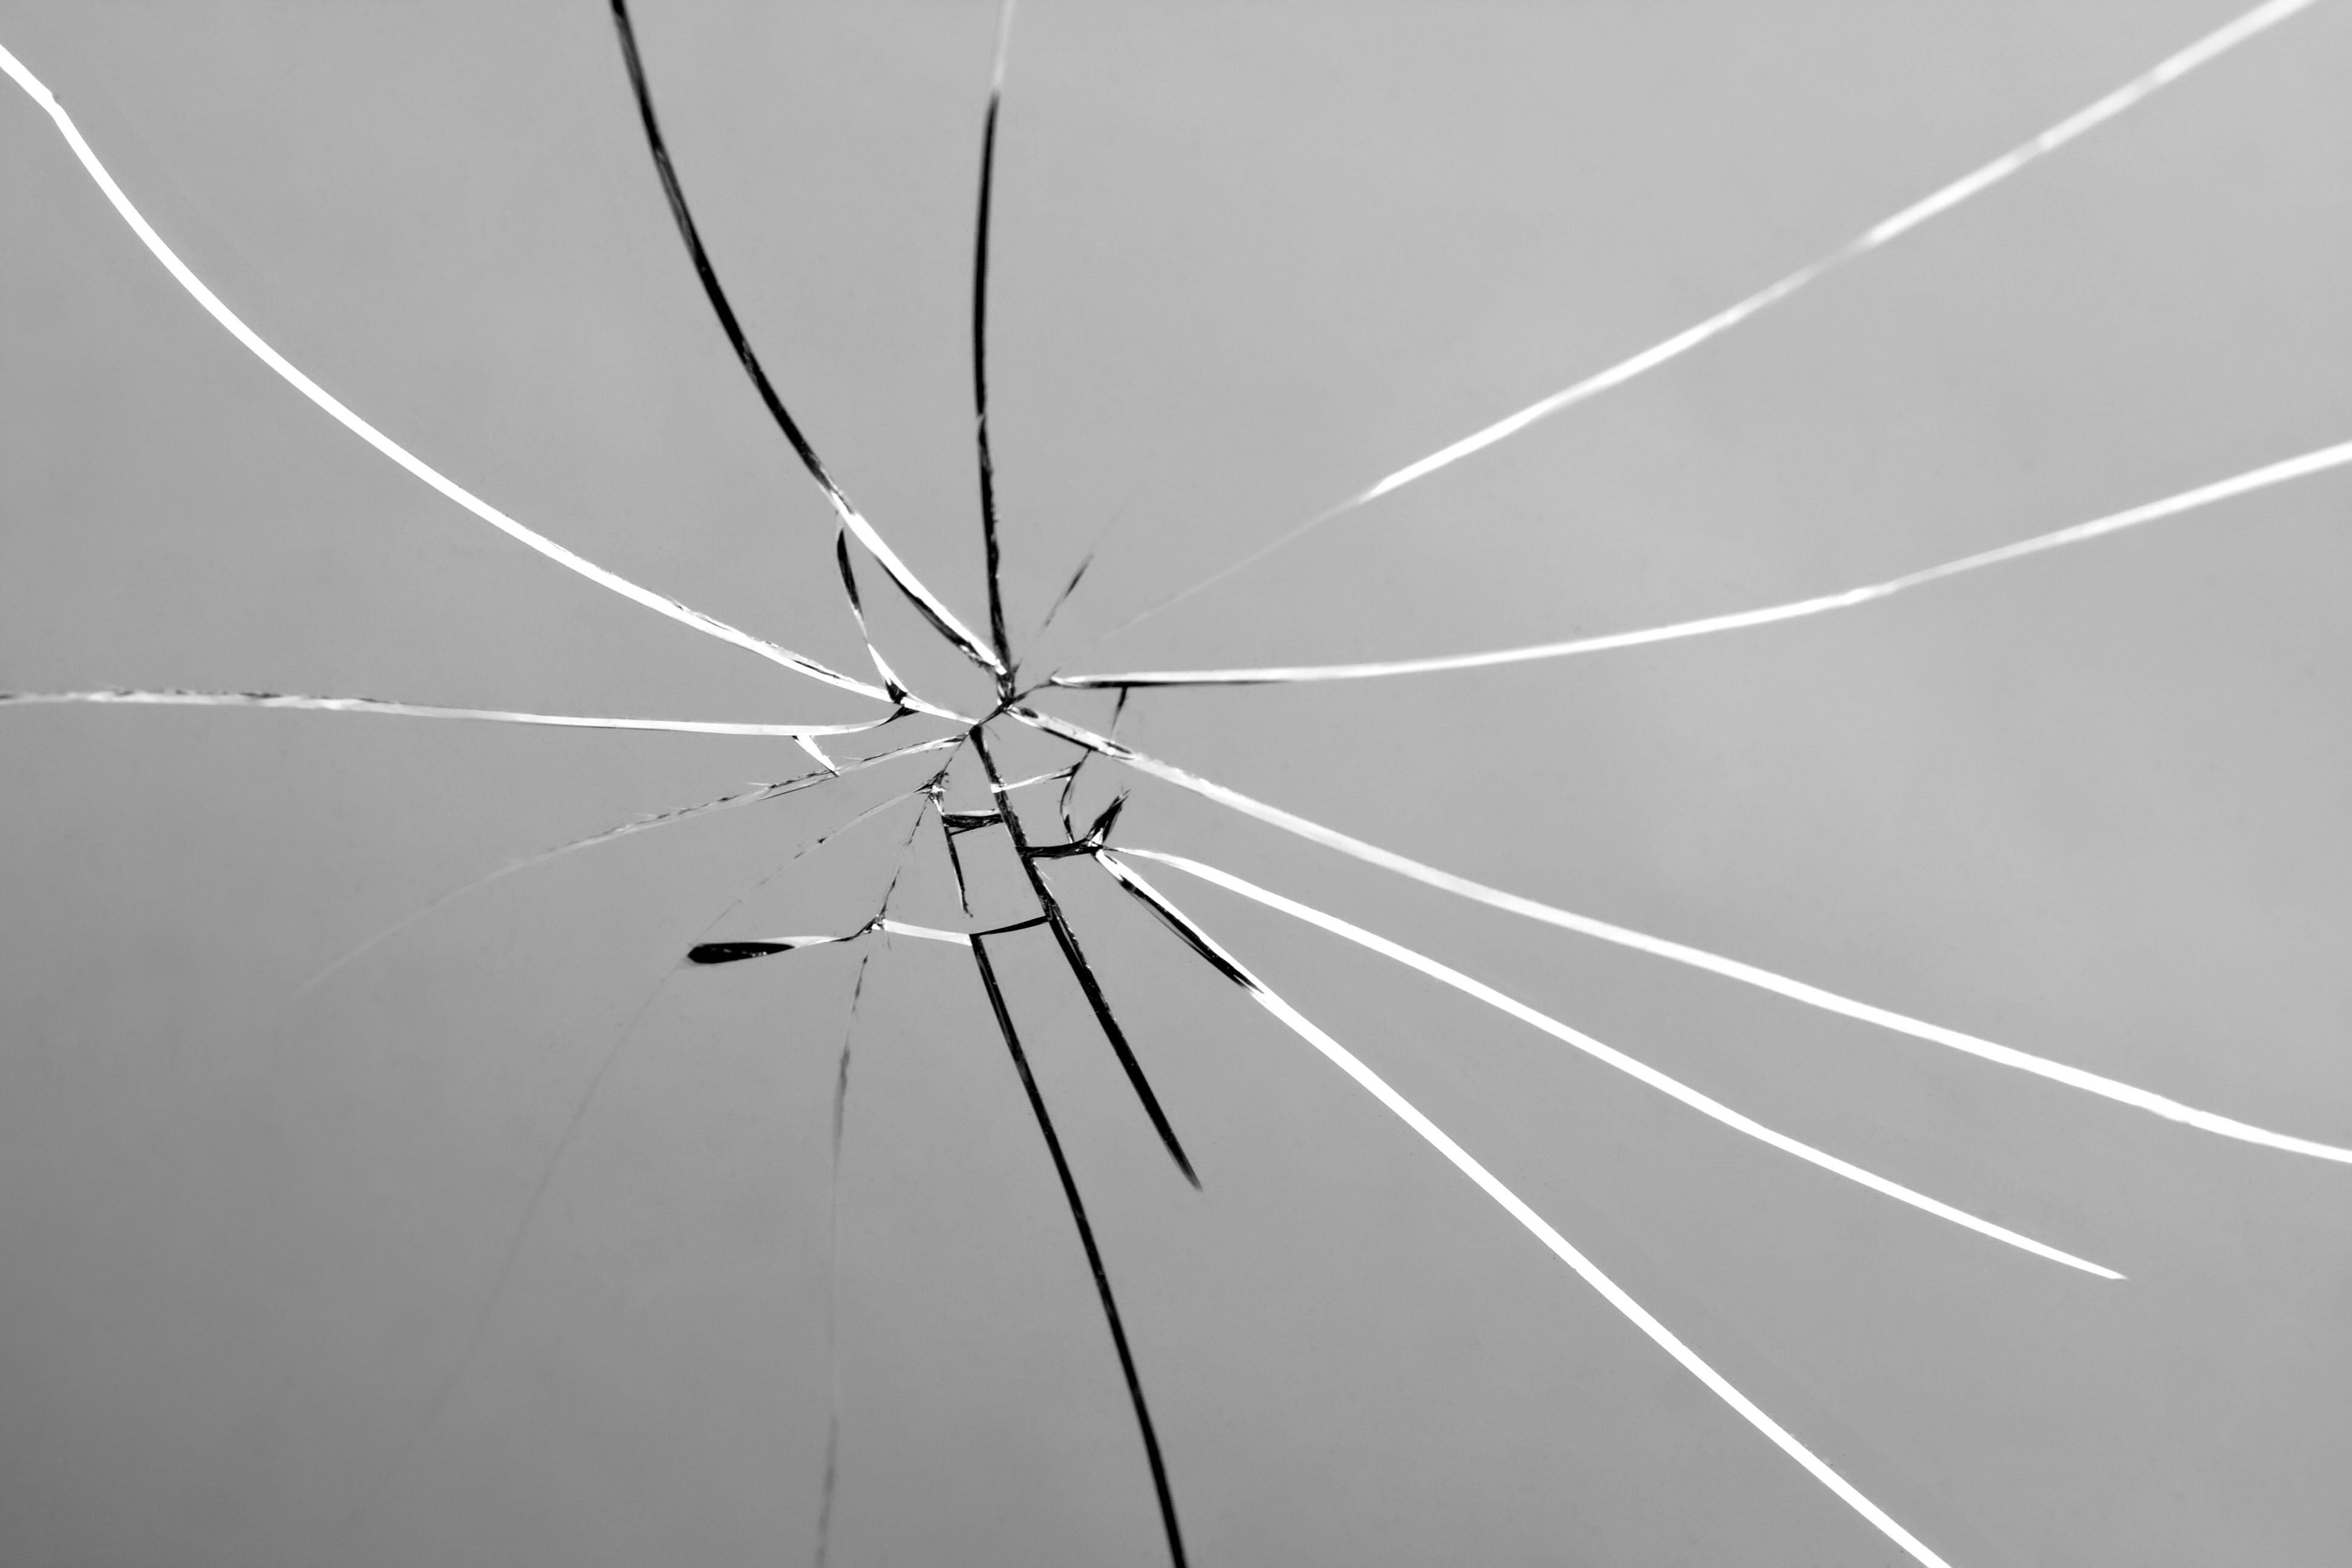

In [8]:
new_pict = record.attributes['Image 2']
from IPython.display import Image
Image(new_pict.value)

In [9]:
new_pict.save(path='example.jpg')